In [1]:
library('readr')
library('magrittr')
library('dplyr')
library('tidyr')
library('ggplot2')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [4]:
donor_counts <-
    read_tsv(
        'counts.tsv',
        col_types=cols(
            `Donor`=col_factor(levels=c("D3", "D4", "D7", "D8", "D9", "D14", "D15")),
            .default=col_double()
        )
    )

donor_counts

Donor,PBMC count,T cell count,T cell / PBMC
D3,1.35e+09,2.5e+08,18.52
D4,3.50e+08,1.2e+08,34.29
D7,7.50e+08,2.4e+08,32.00
D8,6.40e+08,5.7e+08,89.06
D9,6.00e+08,4.8e+08,80.00
D14,1.00e+09,2.0e+08,20.00
D15,7.60e+08,3.6e+08,47.37


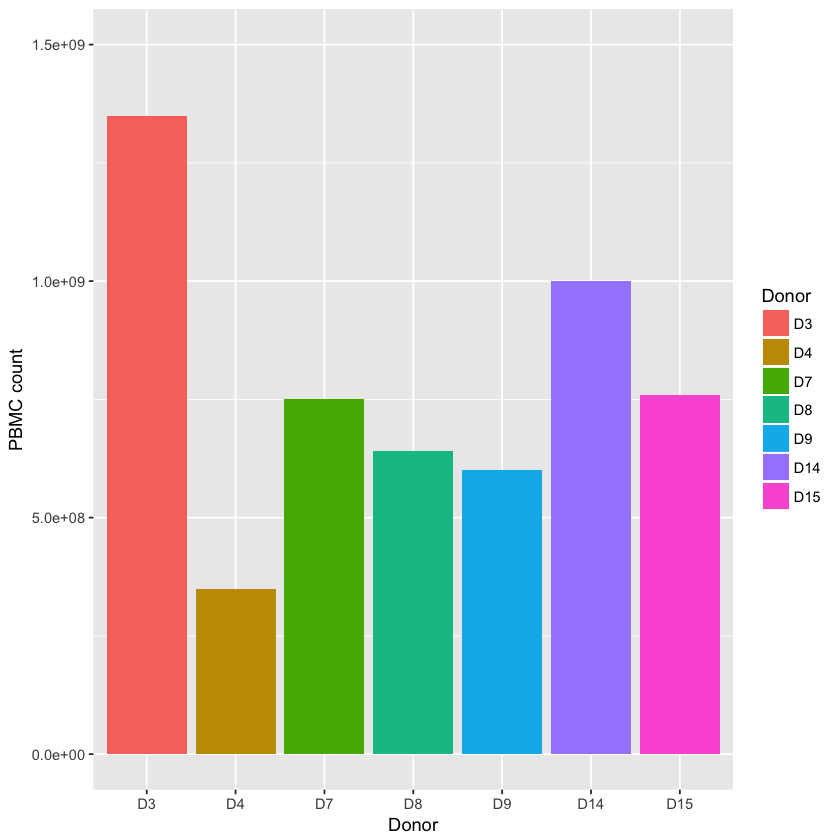

In [10]:
donor_counts %>%
    ggplot(aes(x=`Donor`, y=`PBMC count`, fill=`Donor`)) +
    geom_col() +
    ylim(0, 1.5e9)

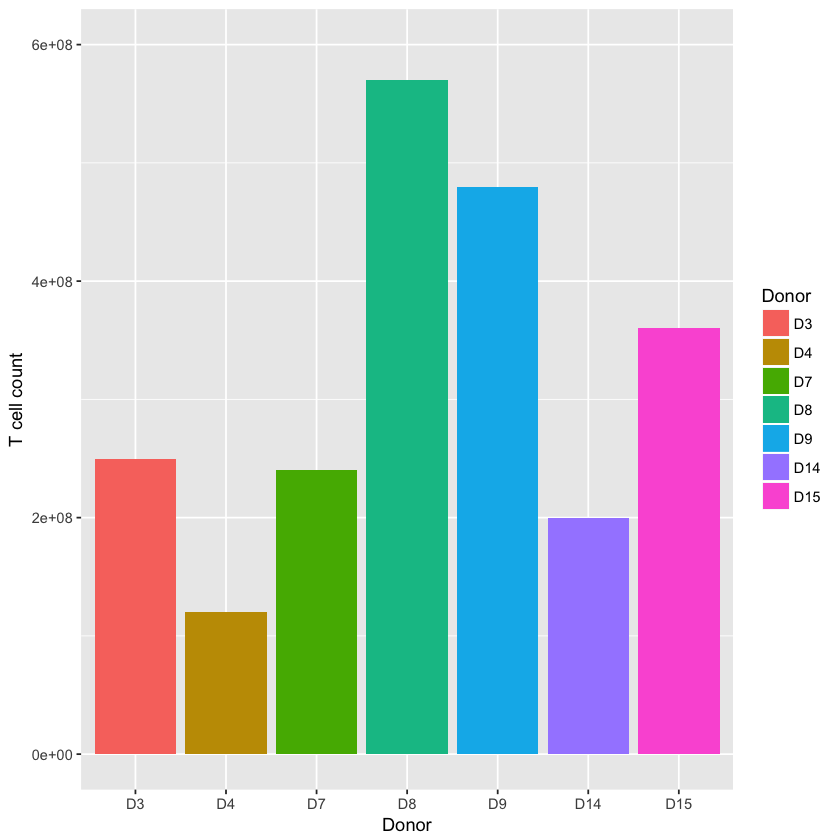

In [14]:
donor_counts %>%
    ggplot(aes(x=`Donor`, y=`T cell count`, fill=`Donor`)) +
    geom_col() +
    ylim(0, 6e8)

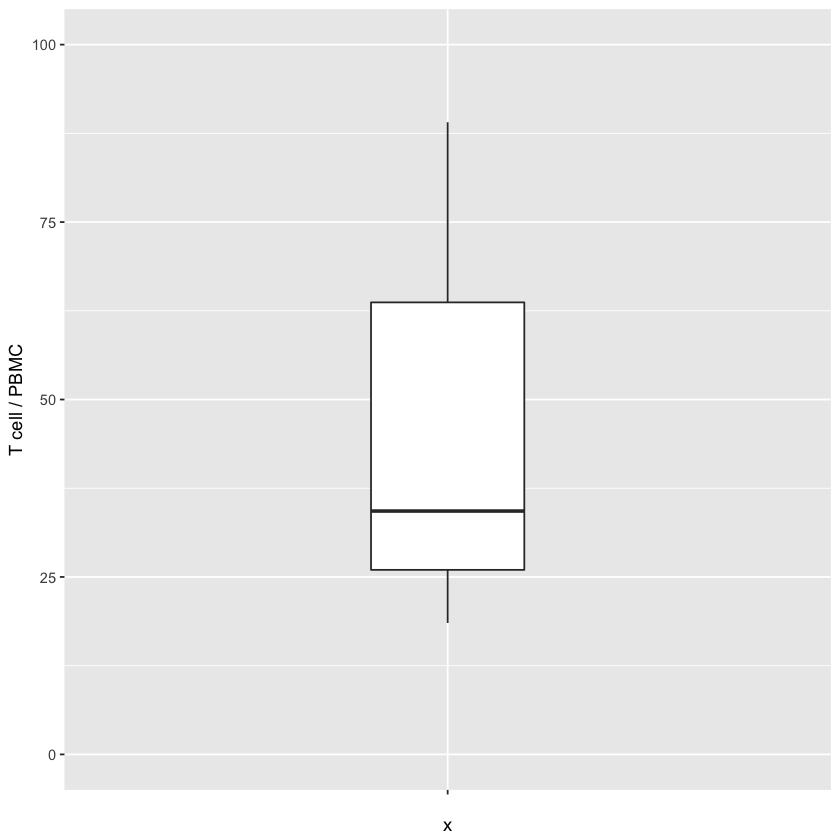

In [30]:
donor_counts %>%
    mutate(`T cell / PBMC`=`T cell count`/`PBMC count`*100) %>%
    ggplot(aes(y=`T cell / PBMC`, x="")) + 
        geom_boxplot(width=.2) +
        ylim(0, 100) +
        tl
